In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 70% !important; }</style>"))
pd.set_option("display.max_columns", 65)

In [31]:
df = pd.read_csv('./datas/final_1.csv')

### train/test 데이터 분리
- train(df2) : 시즌 2010 ~ 2017
- test(df1) :  시즌 2018

In [32]:
df1 = df[df.시즌 == 2017]
df2 = df[df.시즌 <= 2016]

In [49]:
def season_category():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    fig = make_subplots(
        rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.02,
    )

    a = df2.연봉.groupby([df2.시즌]).mean()
    b = df2.OPS.groupby([df2.시즌]).mean()

    fig.add_trace(go.Bar(x=a.index, y=a, name="시즌별 연봉"), row=1, col=1)
    fig.add_trace(go.Bar(x=b.index, y=b, name="시즌별 OPS"), row=1, col=2)
    fig.update_layout(title_text="시즌별 연봉과 OPS 비교")
    fig.show()

### 시즌 카테고리

In [50]:
season_category()

### 나이 카테고리

In [51]:
def age_category():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    fig = make_subplots(
        rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.02,
    )

    a = df2.연봉.groupby([df2.나이]).mean()
    b = df2.OPS.groupby([df2.나이]).mean()

    fig.add_trace(go.Line(x=a.index, y=a, name="나이별 연봉"), row=1, col=1)
    fig.add_trace(go.Line(x=b.index, y=b, name="나이별 OPS"), row=1, col=2)

    fig.update_layout(title_text="나이별 연봉과 OPS 비교")
    fig.show()

In [52]:
age_category()

### 시즌 참가 횟수

In [53]:
def num_category():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    fig = make_subplots(
        rows=1, cols=2, vertical_spacing=0.02)
    test = df2[df2.타석 >= 30]
    a = test.연봉.groupby([test.횟수]).mean()
    b = test.OPS.groupby([test.횟수]).mean()

    test['OPS_round'] = round(test.OPS, 1)
    test1 = test[(test['OPS_round'] >= 0.7) & (test['OPS_round'] <= 0.9)]

    fig.add_trace(go.Bar(x=a.index, y=a, name="시즌 참가 횟수별 연봉"), row=1, col=1)
    fig.add_trace(go.Bar(x=b.index, y=b, name="시즌 참가 횟수별 OPS"), row=1, col=2)
    fig.update_layout(title_text="시즌 참가 횟수별 연봉과 OPS")
    fig.show()

In [54]:
num_category()

In [37]:
def column_new(df):
    # 시즌 카테고리
    df['시즌C'] = df.시즌.apply(lambda x: 0 if x <= 2013 else x)
    # 2014년도에 처음으로 억대 연봉선수 생김
    df['시즌C'] = df.시즌C.apply(lambda x: 1 if 2014 == x else x)
    df['시즌C'] = df.시즌C.apply(lambda x: 2 if x > 2014 else x)

    # 경력
    df['경력'] = df['시즌'] - df['데뷔']

    # 이적횟수
    df['이적'] = None
    for x in df['이름']:
        df['이적'][df['이름'] == x] = len(df[df['이름'] == x]['팀'].unique()) - 1
    df.이적 = df.이적.astype(int)

    # 골든 글러브 카테고리
    df.GG1 = df.GG1.apply(lambda x: 4 if x >= 4 else x)

    # 나이 카테고리
    df['나이C'] = df.나이.apply(lambda x: 0 if x <= 23 else x)
    df['나이C'] = df.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
    df['나이C'] = df.나이C.apply(lambda x: 2 if 30 >= x > 26 else x)
    df['나이C'] = df.나이C.apply(lambda x: 3 if 35 >= x > 30 else x)
    df['나이C'] = df.나이C.apply(lambda x: 4 if 38 >= x > 35 else x)
    df['나이C'] = df.나이C.apply(lambda x: 5 if x >= 39 else x)

    # 출전횟수
    df['횟수'] = 1
    for id_x in df.이름.unique():
        df["횟수"].loc[df[df["이름"] == id_x].reset_index()["index"]] = list(
            df[df["이름"] == id_x].reset_index().reset_index()["level_0"] + 1)
    # 로그연봉
    df['로그연봉'] = np.log(df['연봉'])

In [38]:
column_new(df1)

In [39]:
column_new(df2)

### 변수에 스케일링을 한 이유

In [55]:
# 변수마다 차이가 커서 scaling을 해줘야 함
def scaling():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    fig = go.Figure()
    fig.add_trace(go.Box(y=df2['G'], name='G'))
    fig.add_trace(go.Box(y=df2['나이'], name='나이'))
    fig.add_trace(go.Box(y=df2['루타'], name='루타'))
    fig.add_trace(go.Box(y=df2['trans'], name='물가'))
    fig.add_trace(go.Box(y=df2['경력'], name='경력'))
    fig.update_layout(title_text="스케일링 해주는 이유")
    fig.show()

In [58]:
scaling()

### 용병 여부

In [56]:
def for_kor_category():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    kor = df2[df2['용병'] == 0]
    a = kor.연봉.groupby([kor.시즌]).mean()
    fore = df2[df2['용병'] == 1]
    b = fore.연봉.groupby([fore.시즌]).mean()

    fig = go.Figure()

    fig.add_trace(go.Bar(x=a.index, y=a, name="시즌별 한국인  평균 연봉"))
    fig.add_trace(go.Bar(x=b.index, y=b, name="시즌별 용병 평균 연봉"))
    # fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
    # marker_line_width=1.5, opacity=0.6)
    fig.update_layout(title='용병 여부에 따른 평균 연봉')
    fig.show()


In [57]:
for_kor_category()

### 필요한 열 추가

In [42]:
def column_new(df):
    # 시즌 카테고리
    df['시즌C'] = df.시즌.apply(lambda x: 0 if x <= 2013 else x)
    # 2014년도에 처음으로 억대 연봉선수 생김
    df['시즌C'] = df.시즌C.apply(lambda x: 1 if 2014 == x else x)
    df['시즌C'] = df.시즌C.apply(lambda x: 2 if x > 2014 else x)

    # 경력
    df['경력'] = df['시즌'] - df['데뷔']

    # 이적횟수
    df['이적'] = None
    for x in df['이름']:
        df['이적'][df['이름'] == x] = len(df[df['이름'] == x]['팀'].unique()) - 1
    df.이적 = df.이적.astype(int)

    # 골든 글러브 카테고리
    df.GG1 = df.GG1.apply(lambda x: 4 if x >= 4 else x)

    # 나이 카테고리
    df['나이C'] = df.나이.apply(lambda x: 0 if x <= 23 else x)
    df['나이C'] = df.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
    df['나이C'] = df.나이C.apply(lambda x: 2 if 30 >= x > 26 else x)
    df['나이C'] = df.나이C.apply(lambda x: 3 if 35 >= x > 30 else x)
    df['나이C'] = df.나이C.apply(lambda x: 4 if 38 >= x > 35 else x)
    df['나이C'] = df.나이C.apply(lambda x: 5 if x >= 39 else x)

    # 출전횟수
    df['횟수'] = 1
    for id_x in df.이름.unique():
        df["횟수"].loc[df[df["이름"] == id_x].reset_index()["index"]] = list(
            df[df["이름"] == id_x].reset_index().reset_index()["level_0"] + 1)
    # 로그연봉
    df['로그연봉'] = np.log(df['연봉'])

In [43]:
column_new(df1)
column_new(df2)

#### 1. 모델 1

In [44]:
formula1 = '연봉 ~ C(포지션) + C(시즌C)+ C(나이C):scale(경력) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(용병) +scale(이적) + scale(ISOD) + scale(BBK) +scale(횟수)'
model1 = sm.OLS.from_formula(formula1, data=df2)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     연봉   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     62.11
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          9.48e-167
Time:                        19:08:04   Log-Likelihood:                -8671.6
No. Observations:                 808   AIC:                         1.740e+04
Df Residuals:                     782   BIC:                         1.752e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.124e+

In [45]:
from sklearn.model_selection import KFold
scores1 = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]
    model1 = sm.OLS.from_formula(formula1, data=df_train)
    result1 = model1.fit()
    pred1 = result1.predict(df_test)
    rss = ((df_test.연봉 - pred1) ** 2).sum()
    tss = ((df_test.연봉 - df_test.연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores1[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result1.rsquared, rsquared))

학습 R2 = 0.65333763, 검증 R2 = 0.68727395
학습 R2 = 0.69096687, 검증 R2 = 0.46685029
학습 R2 = 0.68058757, 검증 R2 = 0.58916978
학습 R2 = 0.66470085, 검증 R2 = 0.63708486
학습 R2 = 0.66646359, 검증 R2 = 0.43003290


In [59]:
def model1():
    import plotly.graph_objects as go
    import pandas as pd

    pred1 = result1.predict(df2)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2['연봉'], y=pred1,
                             mode='markers', marker_color=df2['로그연봉']))

    fig.update_layout(title='model 1 : 야구선수 연봉 예측')
    fig.show()


In [61]:
model1()

## 2. 모델 2
- 연봉에 로그를 취함

In [63]:
formula2 = '로그연봉 ~ C(포지션) + C(시즌C)+ C(나이C):scale(경력) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(용병) +scale(이적) + scale(ISOD) + scale(BBK) +scale(횟수)'
model2 = sm.OLS.from_formula(formula2, data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.77e-276
Time:                        19:26:07   Log-Likelihood:                -391.84
No. Observations:                 808   AIC:                             835.7
Df Residuals:                     782   BIC:                             957.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.09

In [64]:
from sklearn.model_selection import KFold

scores2 = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=3)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]
    model = sm.OLS.from_formula(formula2, data=df_train)
    result2 = model2.fit()
    pred2 = result2.predict(df_test)
    rss = ((df_test.로그연봉 - pred2) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores2[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result2.rsquared, rsquared))

학습 R2 = 0.82559509, 검증 R2 = 0.80124117
학습 R2 = 0.82559509, 검증 R2 = 0.82517352
학습 R2 = 0.82559509, 검증 R2 = 0.78548112
학습 R2 = 0.82559509, 검증 R2 = 0.87074247
학습 R2 = 0.82559509, 검증 R2 = 0.84018236


In [66]:
def model2():
    import plotly.graph_objects as go
    import pandas as pd

    pred2 = result2.predict(df2)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2['로그연봉'], y=pred2,
                             mode='markers', marker_color=df2['로그연봉']))
    fig.update_layout(title='야구선수 연봉 예측')
    fig.show()
    


In [67]:
model2()

## 3. 모델 3
 - 수상 지표 추가(크롤링)

In [69]:
def prize():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    fig = make_subplots(rows=1, cols=2, shared_xaxes=True,
                        vertical_spacing=0.02)

    a = df2.연봉.groupby([df2.수상N1]).mean()
    b = df2.연봉.groupby([df2.수상]).mean()

    fig.add_trace(go.Bar(x=a.index, y=a, name="수상 누적 횟수별 연봉"), row=1, col=1)
    fig.add_trace(go.Bar(x=b.index, y=b, name="수상종류별 연봉"), row=1, col=2)
    fig.update_layout(title_text="수상 누적 횟수와 종류별 연봉")
    fig.show()
    


In [68]:
prize()

In [71]:
def team_rank():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    fig = go.Figure()
    temp = df2[df2['팀'] == 'KIA'].groupby(df2['순위']).mean()
    fig.add_trace(go.Bar(x=temp["순위"], y=temp["연봉"], name='KIA'))
    temp1 = df2[df2['팀'] == '삼성'].groupby(df2['순위']).mean()
    fig.add_trace(go.Bar(x=temp1["순위"], y=temp1["연봉"], name='삼성'))
    temp2 = df2[df2['팀'] == '두산'].groupby(df2['순위']).mean()
    fig.add_trace(go.Bar(x=temp2["순위"], y=temp2["연봉"], name='두산'))

    fig.update_layout(title_text="팀당 순위별 연봉 변화")
    fig.show()
    


In [70]:
team_rank()

In [73]:
def position_mvp():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    mvp = df2[df2['MVP1'] == 0]
    mvp1 = df2[df2['MVP1'] == 1]

    a = mvp.연봉.groupby([mvp.포지션]).mean()
    b = mvp1.연봉.groupby([mvp1.포지션]).mean()

    fig = go.Figure()

    fig.add_trace(go.Bar(x=a.index, y=a, name="포지션별 연봉"))
    fig.add_trace(go.Bar(x=b.index, y=b, name="시즌 MVP를 수상 연봉"))

    fig.update_layout(title='포지션별 시즌MVP 수상 여부에 따른 연봉')
    fig.show()
    


In [72]:
position_mvp()

In [75]:
def GG_안타():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    fig = go.Figure()
    ngg = df2[df2.GG1 == 0]

    df2['안타1'] = None
    df2['안타1'] = df2.안타.apply(lambda x: 0 if x <= 17 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: 17 if 56 >= x > 17 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: 56 if 105 >= x > 56 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: 105 if x > 105 else x)

    df2['안타1'] = df2.안타1.apply(lambda x: '0~17' if x == 0 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: '17~56' if x == 17 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: '56~105' if x == 56 else x)
    df2['안타1'] = df2.안타1.apply(lambda x: '105~201' if x == 105 else x)

    temp = df2[df2['GG1'] == 0].groupby(df2['안타1']).mean()
    temp.sort_values('로그연봉', inplace=True)
    fig.add_trace(go.Bar(x=temp.index, y=temp["연봉"], name='GG 수상하지 않은 경우'))
    temp1 = df2[df2['GG1'] >= 1].groupby(df2['안타1']).mean()
    fig.add_trace(go.Bar(x=temp1.index, y=temp1["연봉"], name='GG 수상한 경우'))

    fig.update_layout(title_text="안타와 GG 상호작용 이유")
    fig.show()



In [74]:
GG_안타()

In [76]:
formula3 = '로그연봉 ~ C(포지션):C(MVP1) + C(시즌C) + scale(나이):scale(경력) + scale(횟수) + scale(G) + C(GG):scale(안타) + scale(도루) +scale(고4) + scale(타3) + C(용병) + scale(ISOD) +  scale(수상N) + scale(수상N1) + C(계약) + scale(WAR) + scale(이적) + scale(POMVP1) + scale(ALMVP1) + C(팀):scale(순위)'
model3 = sm.OLS.from_formula(formula3, data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          4.70e-275
Time:                        19:28:54   Log-Likelihood:                -362.23
No. Observations:                 808   AIC:                             802.5
Df Residuals:                     769   BIC:                             985.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [77]:
from sklearn.model_selection import KFold
scores3 = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=2)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]
    model3 = sm.OLS.from_formula(formula3, data=df_train)
    result3 = model3.fit()
    pred3 = result3.predict(df_test)
    rss = ((df_test.로그연봉 - pred3) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores3[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result3.rsquared, rsquared))

학습 R2 = 0.84094142, 검증 R2 = 0.81968718
학습 R2 = 0.85052591, 검증 R2 = 0.76953932
학습 R2 = 0.83870805, 검증 R2 = 0.81499864
학습 R2 = 0.83043267, 검증 R2 = 0.85924560
학습 R2 = 0.83879100, 검증 R2 = 0.81957969


In [78]:
def model3():
    import plotly.graph_objects as go
    import pandas as pd
    model3 = sm.OLS.from_formula(formula3, data=df2)
    result3 = model3.fit()
    pred3 = result3.predict(df2)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2['로그연봉'], y=pred3,
                             mode='markers', marker_color=df2['로그연봉']))
    fig.add_trace(go.Scatter(x=[7.5, 10, 12], y=[7.5, 10, 12]))
    fig.update_layout(title='model3 야구선수 연봉 예측')
    fig.show()


In [79]:
model3()

## 4. 모델 4
 - FA 계약 추가(카테고리)
    - FA 계약 체결 당해년도
    - FA 계약중
    - FA 계약 X
- FA 계약중인 선수는 이전년도의 연봉과 같아서 데이터를 분리한뒤
    - 계약중이 아닌 데이터로 학습 -> 예측
    - 계약중인 데이터는 이전년도의 연봉을 가져옴
    
- 현재가치 반영(trans)
 

In [85]:
formula4 = '로그연봉 ~ C(포지션):C(MVP1) + C(시즌C) + scale(나이):scale(횟수) +scale(경력) + scale(G) + C(GG):scale(안타) + scale(도루) +scale(고4) + scale(타3) + C(용병) + scale(ISOD) +  scale(수상N) + scale(수상N1) + C(계약) + scale(WAR) + scale(이적) + scale(POMVP1) + C(팀):scale(순위) + scale(trans)'
model4 = sm.OLS.from_formula(formula4, data=df2)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     125.5
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.47e-303
Time:                        19:30:02   Log-Likelihood:                -290.12
No. Observations:                 808   AIC:                             660.2
Df Residuals:                     768   BIC:                             848.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [91]:
from sklearn.model_selection import KFold
scores4 = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=2)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]
    
    df_train = df_train[df_train["계약"] != "계약중"]
    df_test_FA = df_test[df_test["계약"] == "계약중"]['로그연봉']
    df_test_t = df_test[df_test["계약"] != "계약중"]
    
    model4 = sm.OLS.from_formula(formula4, data=df_train)
    result4 = model4.fit()
    pred4 = result4.predict(df_test_t)

    rss = ((df_test.로그연봉 - df_test_FA.append(pred4)) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores4[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result4.rsquared, rsquared))

학습 R2 = 0.85671230, 검증 R2 = 0.85262344
학습 R2 = 0.85896391, 검증 R2 = 0.85229632
학습 R2 = 0.85478562, 검증 R2 = 0.87972664
학습 R2 = 0.85315938, 검증 R2 = 0.86245130
학습 R2 = 0.85414384, 검증 R2 = 0.87255113


In [103]:
df3 = df2[df2['계약'] != '계약중']
def model4():
    import plotly.graph_objects as go
    import pandas as pd
    model4 = sm.OLS.from_formula(formula4, data=df3)
    result4 = model4.fit()
    pred4 = result4.predict(df3)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df3['로그연봉'], y=pred4,
                             mode='markers', marker_color=df3['로그연봉']))
    fig.add_trace(go.Scatter(x=[7.5, 10, 12], y=[7.5, 10, 12]))
    fig.update_layout(title='model4 야구선수 연봉 예측')
    fig.show()
    


In [104]:
model4()

In [127]:
def scores():
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    scores = [scores1, scores2, scores3, scores4]
    fig = go.Figure()
    fig.add_trace(go.Box(y=scores1, name='model1'))
    fig.add_trace(go.Box(y=scores2, name='model2'))
    fig.add_trace(go.Box(y=scores3, name='model3'))
    fig.add_trace(go.Box(y=scores4, name='model4'))
    
    fig.update_layout(title_text="모델별 성능")
    fig.show()

In [128]:
scores()

## test 데이터로 검증

In [106]:
df1 = df1.reset_index(drop=True)
df1X = df1.drop(['연봉', '로그연봉'], axis=1)
df1y = df1['로그연봉']

df1A = df1[df1.계약 == '계약중']['로그연봉']
df1B = df1X[df1X.계약 != '계약중']
pred = result4.predict(df1B)


In [107]:
df1 = df1.reset_index(drop=True)
df1X = df1.drop(['연봉', '로그연봉'], axis=1)
df1y = df1['로그연봉']

df1A = df1[df1.계약 == '계약중']['로그연봉']
df1B = df1X[df1X.계약 != '계약중']
pred = result4.predict(df1B)

yhat = pd.concat([pred, df1A]).sort_index()

In [108]:
mse = sk.metrics.mean_squared_error(df1y, yhat, sample_weight=None, multioutput='uniform_average')
mae = sk.metrics.mean_absolute_error(df1y, yhat, sample_weight=None, multioutput='uniform_average')
r2 = sk.metrics.r2_score(df1y, yhat, sample_weight=None, multioutput='uniform_average')
mse, mae, r2

(0.09979634807009435, 0.23053981161332152, 0.9031000898885821)

In [118]:
def test():
    import plotly.graph_objects as go

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1['로그연봉'], y=yhat, mode='markers', marker_color=df1['로그연봉']))
    fig.add_trace(go.Scatter(x=[7.5, 10, 12], y=[7.5, 10, 12]))
    fig.update_layout(title='test 야구선수 연봉 예측 결과')
    fig.show()

In [119]:
test()

## Lasso
- 가중치가 작고, 성능의 변화가 크게 없으므로 정규화를 하지 않아도 됨

In [122]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-10, -2, 30)
# model.fit_regularized(alpha=0.01, L1_wt=0)
train_scores = []
test_scores = []
for alpha in alphas:
    test_ls = []
    train_ls = []
    #test_score = np.mean(result, X, y, scoring='neg_mean_squared_error', cv=5)
    cv = KFold(5, shuffle=True, random_state=2)
    for i, (idx_train, idx_test) in enumerate(cv.split(df3)):
        df_train = df3.iloc[idx_train]
        df_test = df3.iloc[idx_test]

        model = sm.OLS.from_formula(formula4, data=df_train)
        result = model.fit_regularized(alpha=alpha, L1_wt=1)
        pred = result.predict(df_train)
        train_ls.append(-mean_squared_error(df_train.로그연봉, pred))

        pred = result.predict(df_test)
        test_ls.append(-mean_squared_error(df_test.로그연봉, pred))
    train_scores.append(np.mean(train_ls))
    test_scores.append(np.mean(test_ls))
    print(alpha)

1e-10
1.8873918221350996e-10
3.562247890262437e-10
6.723357536499335e-10
1.2689610031679233e-09
2.395026619987491e-09
4.520353656360241e-09
8.531678524172815e-09
1.6102620275609394e-08
3.039195382313195e-08
5.736152510448681e-08
1.0826367338740541e-07
2.0433597178569396e-07
3.856620421163472e-07
7.278953843983146e-07
1.3738237958832638e-06
2.592943797404667e-06
4.893900918477489e-06
9.236708571873865e-06
1.7433288221999873e-05
3.290344562312671e-05
6.210169418915616e-05
0.00011721022975334794
0.000221221629107045
0.00041753189365604
0.0007880462815669905
0.0014873521072935117
0.0028072162039411755
0.005298316906283702
0.01


In [123]:
def lasso():
    optimal_alpha = alphas[np.argmax(test_scores)]
    optimal_score = np.max(test_scores)

    plt.semilogx(alphas, test_scores, '-', label="검증성능")
    plt.semilogx(alphas, train_scores, '--', label="학습성능"),
    plt.axhline(optimal_score, linestyle=':')
    plt.axvline(optimal_alpha, linestyle=':')
    plt.scatter(optimal_alpha, optimal_score)
    plt.ylabel('성능')
    plt.xlabel('정규화 가중치')
    plt.legend()
    plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

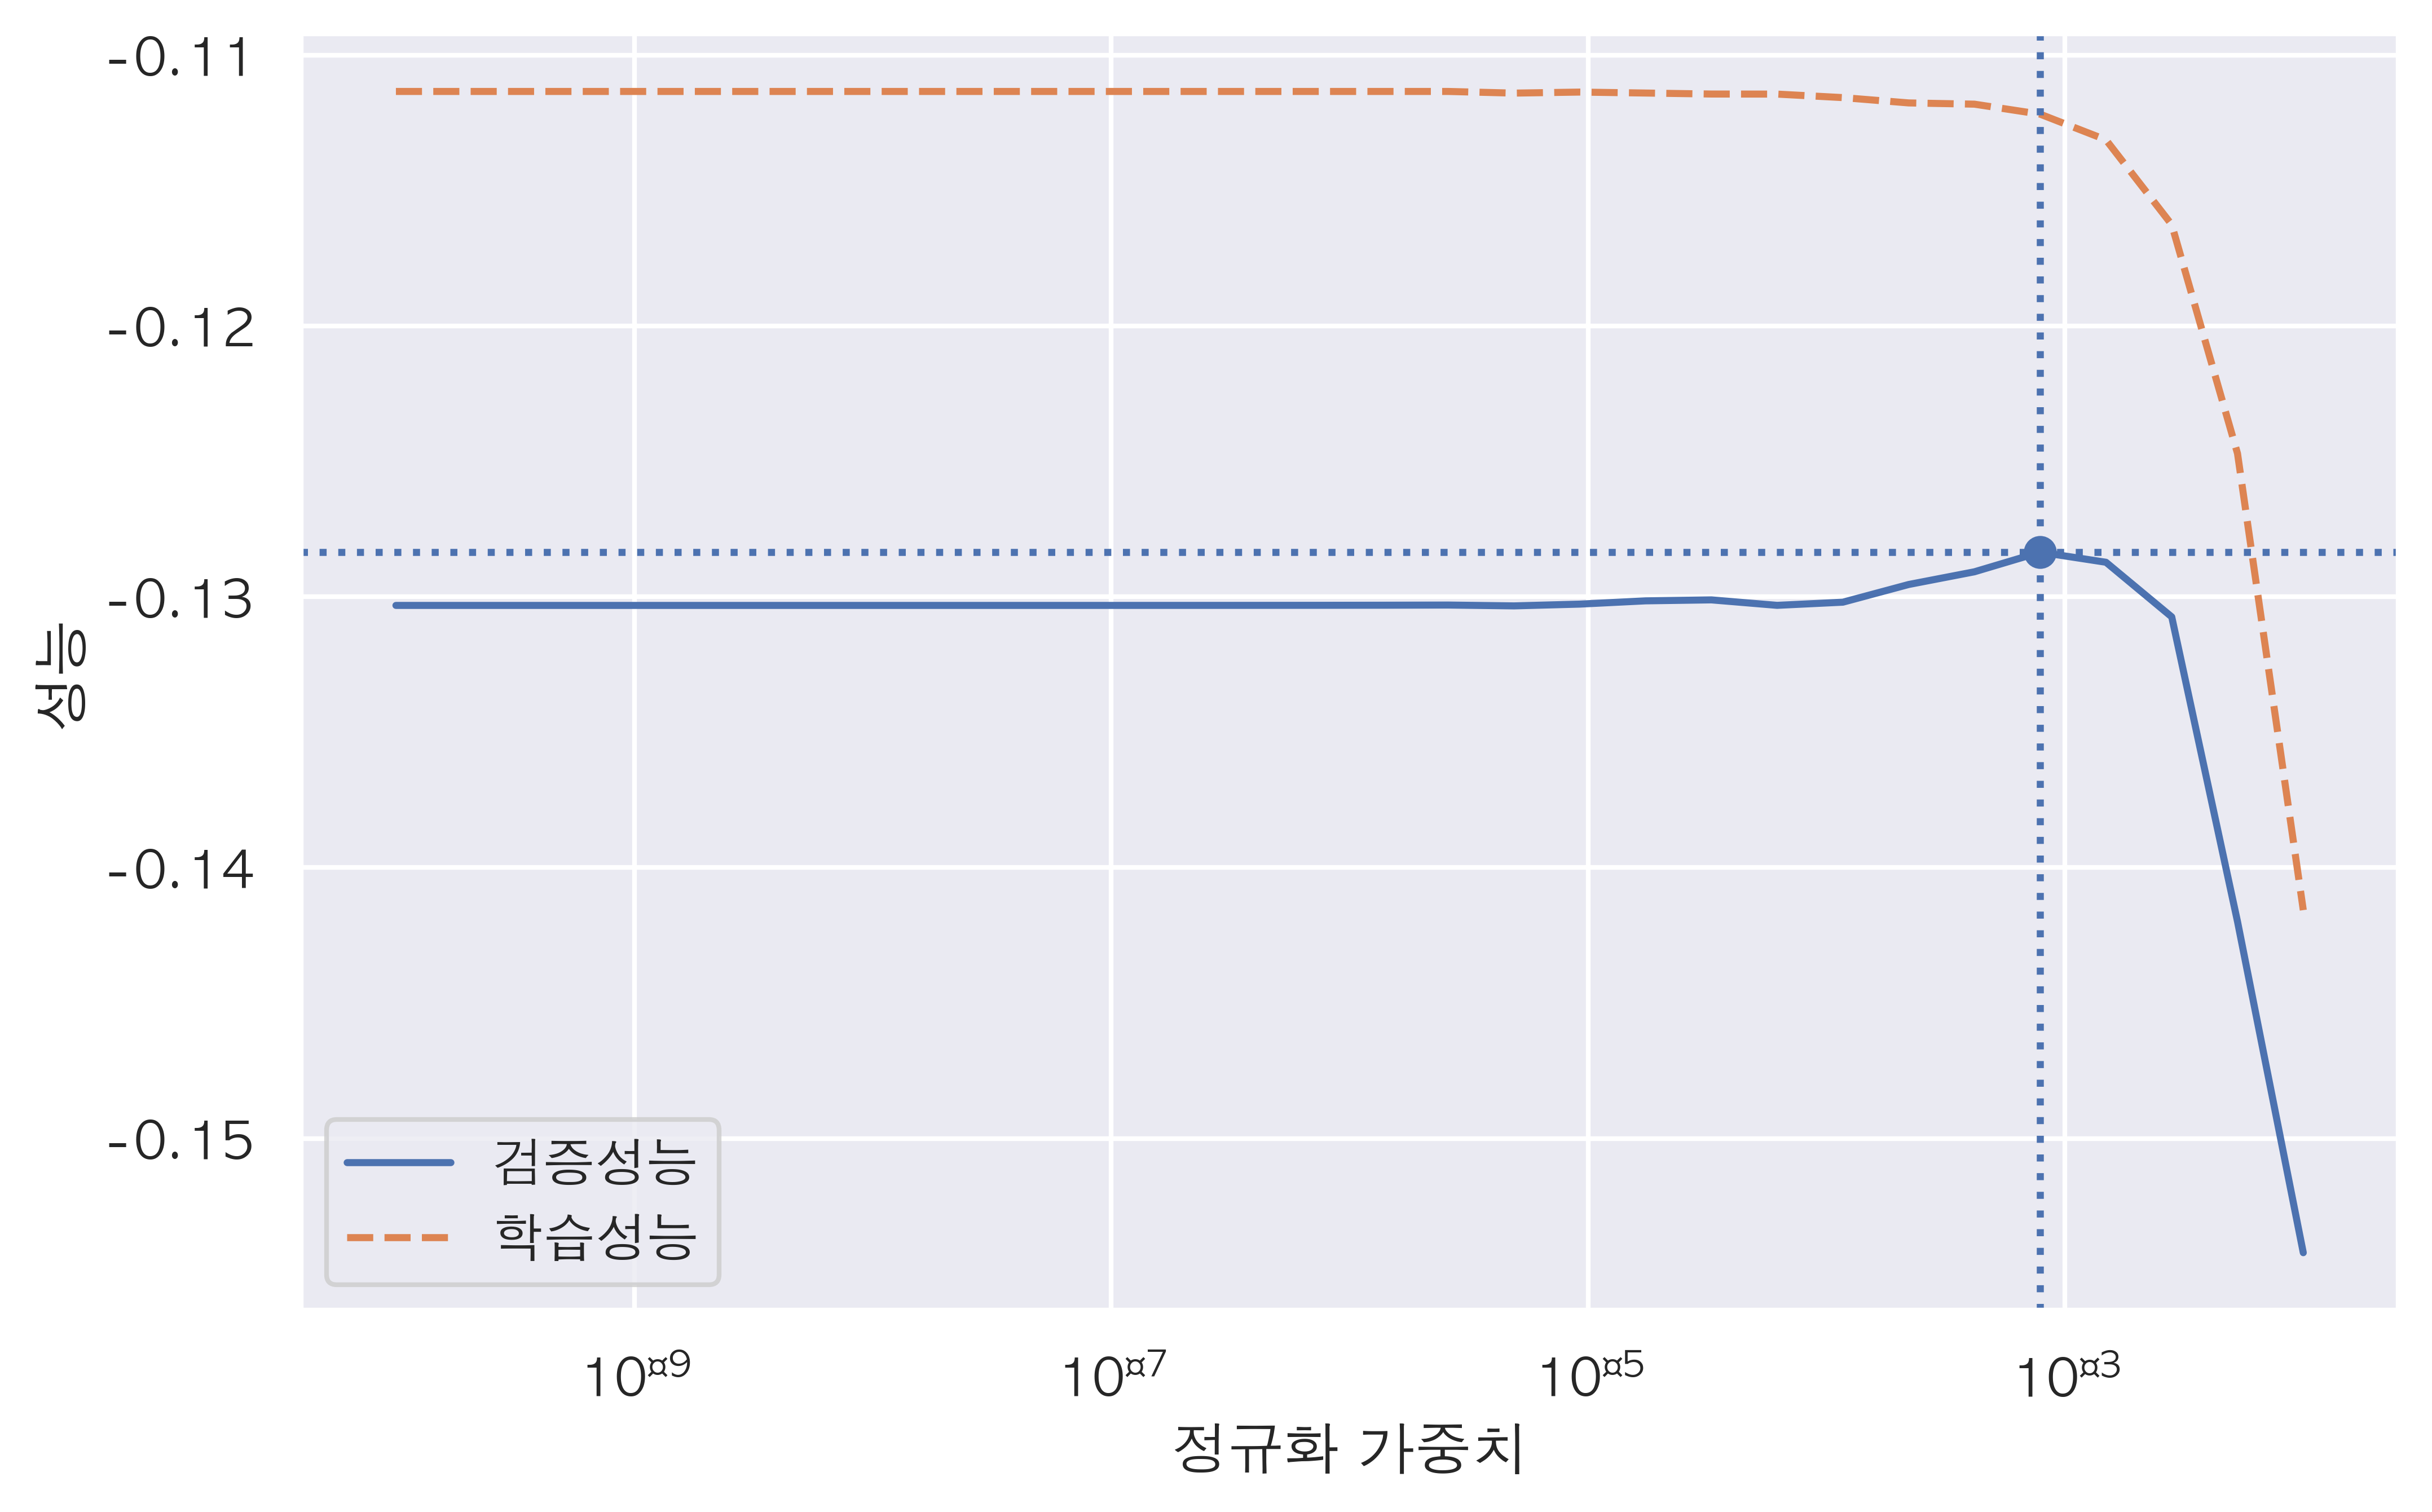

In [124]:
lasso()